In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import special
from scipy.integrate import quad

In [2]:
def lattice(N=100, d=4):
    # Lattice used in QMC
    n = N + 1
    z = np.zeros(d)
    a_korobov = 14471.
    for i in np.arange(d):
        z[i] = a_korobov**i % n

    U_lattice = np.zeros((n, d))
    for m in np.arange(n):
        U_lattice[m, :] = ((z * m) / n) % 1

    return U_lattice[1:]


def ppf(x):
    # ppf of G
    return np.array([norm.ppf(xi) for xi in x])


def norm_inf(x):
    return np.max(np.abs(x))


def norm_2(x):
    return np.linalg.norm(x)


def f(n):
    # return the pdf of D
    def func(x):
        if x < 0:
            return 0
        return n * np.sqrt(2. / np.pi) * np.exp(-x**2. / 2.) * special.erf(
            x / np.sqrt(2.))**(n - 1.)

    return func


def I_inf(n):
    # Numerical result by quad
    def func(x):
        return x**(n - 1) * special.erfinv(x)

    return quad(func, 0, 1)[0] * np.sqrt(2) * n


def I_2(n):
    return np.sqrt(2) * special.gamma((n + 1) / 2.) / special.gamma(n / 2.)


def MC(func, n, M=1000):
    # Numerical result by QMC
    X = lattice(N=M, d=n)
    G = np.array([ppf(x) for x in X])
    Y = [func(x) for x in G]
    # dY = 1.96 * np.std(Y) / np.sqrt(M)
    return np.mean(Y)

### Numerical result of $\mathbb E(\|G\|_\infty)$

In [3]:
func = norm_inf
n = 5
print(MC(func, n))
print(I_inf(n))

1.563843942533445
1.5698337169890155


### Numerical result of $\mathbb E(\|G\|_2)$

In [4]:
func = norm_2
n = 5
print(MC(func, n))
print(I_2(n))

2.1205185165045912
2.1276921621409746


### Plot the pdf of $D=\|G\|_\infty$

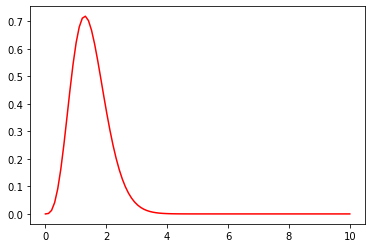

In [5]:
n = 4

X = np.linspace(0, 10, 100)
Y = [f(n)(_) for _ in X]

fig, ax = plt.subplots()
ax.plot(X, Y, "r-")
plt.show()